<a href="https://colab.research.google.com/github/tayanarapaiva/PIM/blob/main/IM_ATV_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ATIVIDADE 06**

1 - Dilatar as imagens do método laplaciano, usar diferentes tamanhos de janela e diferentes elementos estruturante

2 - Erosão

3 - Preenchimento dos objetos

4 - Detecção de bordas

5 - Abertura e Fechamento



 1. Dilatar as imagens do método laplaciano, usar diferentes tamanhos de janela e diferentes elementos estruturante

Carregar a imagem do disco usando a biblioteca OpenCV.

Converter a imagem para tons de cinza usando o método cvtColor().

Aplicar o filtro Laplaciano na imagem usando o método Laplacian().

Binarizar a imagem para criar uma imagem de máscara usando o método threshold().

Criar diferentes elementos estruturantes e diferentes tamanhos de janela para dilatação usando o método getStructuringElement().

Aplicar a dilatação na imagem de máscara usando o método dilate() com os elementos estruturantes criados.

Mostrar a imagem original e a imagem dilatada para comparação.

Segue abaixo o código comentado em Python:








# **1. Dilatar as imagens do método laplaciano, usar diferentes tamanhos de janela e diferentes elementos estruturante**

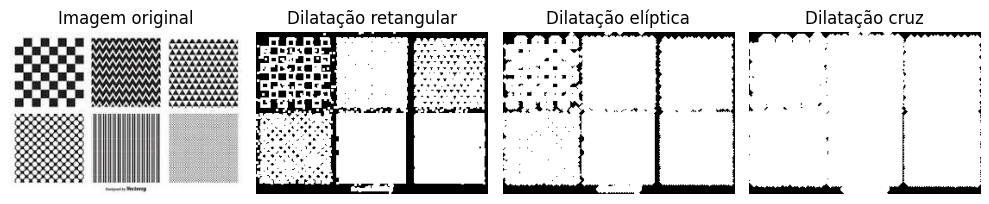

In [ ]:

# Importar as bibliotecas necessárias
import cv2 # biblioteca OpenCV para processamento de imagens
import numpy as np # biblioteca para trabalhar com arrays e matrizes em Python
from google.colab.patches import cv2_imshow # biblioteca para exibir imagens no Google Colab
import matplotlib.pyplot as plt

# Carregar a imagem do disco
#img = cv2.imread('/content/drive/MyDrive/DISCIPLINAS/IMAGENS_MÉDICAS/dinheiro.jpg')
img = cv2.imread('/content/drive/MyDrive/DISCIPLINAS/IMAGENS_MÉDICAS/quadrados.jpeg')
#img = cv2.imread('/content/drive/MyDrive/DISCIPLINAS/IMAGENS_MÉDICAS/planetas.jpeg')
#img = cv2.imread('/content/drive/MyDrive/DISCIPLINAS/IMAGENS_MÉDICAS/moedas.jpeg')
#img = cv2.imread('/content/drive/MyDrive/DISCIPLINAS/IMAGENS_MÉDICAS/if.png')

# Converter a imagem para tons de cinza
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # converte a imagem carregada para tons de cinza

# Aplicar o filtro Laplaciano na imagem
laplacian = cv2.Laplacian(gray, cv2.CV_64F) # aplica o filtro Laplaciano na imagem em tons de cinza


# Binarizar a imagem para criar uma imagem de máscara
_, thresh = cv2.threshold(laplacian, 50, 255, cv2.THRESH_BINARY) # binariza a imagem resultante do filtro Laplaciano com base em um limite de 50 e retorna uma imagem binária na variável 'thresh'

# Criar diferentes elementos estruturantes e diferentes tamanhos de janela para dilatação
kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3)) # cria um elemento estruturante retangular de tamanho 5x5
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3)) # cria um elemento estruturante elíptico de tamanho 9x9
kernel3 = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3)) # cria um elemento estruturante cruz de tamanho 3x3


#Aplicando as dilatações na imagem binária
dilation1 = cv2.dilate(thresh, kernel1, iterations = 1)
dilation2 = cv2.dilate(thresh, kernel2, iterations = 3)
dilation3 = cv2.dilate(thresh, kernel3, iterations = 5)

#Converter as imagens para o formato correto (BGR para RGB)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
dilation1_rgb = cv2.cvtColor(cv2.convertScaleAbs(dilation1), cv2.COLOR_GRAY2RGB)
dilation2_rgb = cv2.cvtColor(cv2.convertScaleAbs(dilation2), cv2.COLOR_GRAY2RGB)
dilation3_rgb = cv2.cvtColor(cv2.convertScaleAbs(dilation3), cv2.COLOR_GRAY2RGB)

#Exibir as imagens
show_images_table([img_rgb, dilation1_rgb, dilation2_rgb, dilation3_rgb], ['Imagem original', 'Dilatação retangular', 'Dilatação elíptica', 'Dilatação cruz'])

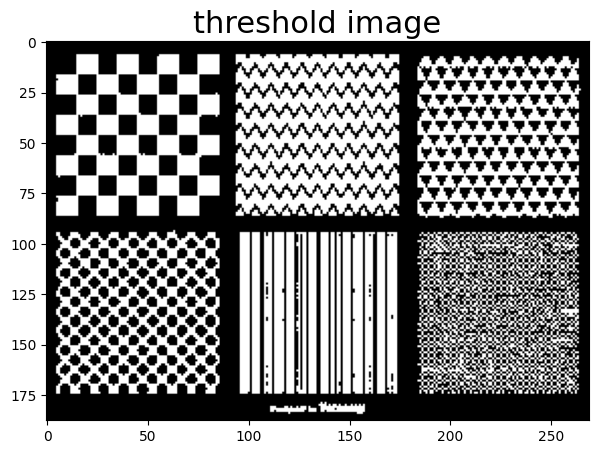

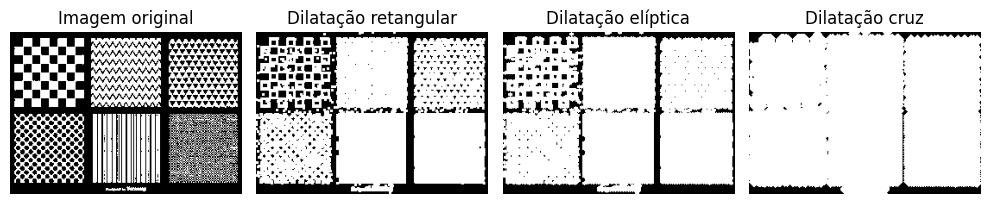

In [ ]:
#--------------------------com filtro


import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

def showSingleImage(img, title, size, mincolor=0, maxcolor=255):
    fig, axis = plt.subplots(figsize = size)

    axis.imshow(img, cmap='gray', vmin=mincolor, vmax=maxcolor)
    axis.set_title(title, fontdict = {'fontsize': 22, 'fontweight': 'medium'})
    plt.show()

def show_images_table(images, titles):
    rows = 1
    cols = len(images)
    fig, axs = plt.subplots(rows, cols, figsize=(10,10))
    for i, ax in enumerate(axs):
        ax.imshow(images[i], cmap='gray')
        ax.set_title(titles[i])
        ax.axis('off')
    plt.tight_layout()
    plt.show()
#-----------------------------------------------------------------------------
# Carrega a imagem a ser erodida
#img = cv2.imread('/content/drive/MyDrive/DISCIPLINAS/IMAGENS_MÉDICAS/rosto.jpg', cv2.IMREAD_GRAYSCALE)
#img = cv2.imread('/content/drive/MyDrive/DISCIPLINAS/IMAGENS_MÉDICAS/moedas.jpeg', cv2.IMREAD_GRAYSCALE)
img = cv2.imread('/content/drive/MyDrive/DISCIPLINAS/IMAGENS_MÉDICAS/quadrados.jpeg', cv2.IMREAD_GRAYSCALE)
#img = cv2.imread('/content/drive/MyDrive/DISCIPLINAS/IMAGENS_MÉDICAS/5.jpg', cv2.IMREAD_GRAYSCALE)
# Converter a imagem para tons de cinza
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # converte a imagem carregada para tons de cinza

# Aplicar o filtro Laplaciano na imagem
#laplacian = cv2.Laplacian(gray, cv2.CV_64F) # aplica o filtro Laplaciano na imagem em tons de cinza


# Binarizar a imagem para criar uma imagem de máscara
#_, thresh = cv2.threshold(laplacian, 50, 255, cv2.THRESH_BINARY) # binariza a imagem resultante do filtro Laplaciano com base em um limite de 50 e retorna uma imagem binária na variável 'thresh'
threshold, img= cv2.threshold(img,190,255,cv2.THRESH_BINARY_INV)
showSingleImage(img, "threshold image",(7,7))
# Criar diferentes elementos estruturantes e diferentes tamanhos de janela para dilatação
kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3)) # cria um elemento estruturante retangular de tamanho 5x5
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5)) # cria um elemento estruturante elíptico de tamanho 9x9
kernel3 = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3)) # cria um elemento estruturante cruz de tamanho 3x3


#Aplicando as dilatações na imagem binária
dilation1 = cv2.dilate(thresh, kernel1, iterations = 1)
dilation2 = cv2.dilate(thresh, kernel2, iterations = 1)
dilation3 = cv2.dilate(thresh, kernel3, iterations = 5)

#Converter as imagens para o formato correto (BGR para RGB)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
dilation1_rgb = cv2.cvtColor(cv2.convertScaleAbs(dilation1), cv2.COLOR_GRAY2RGB)
dilation2_rgb = cv2.cvtColor(cv2.convertScaleAbs(dilation2), cv2.COLOR_GRAY2RGB)
dilation3_rgb = cv2.cvtColor(cv2.convertScaleAbs(dilation3), cv2.COLOR_GRAY2RGB)

#Exibir as imagens
show_images_table([img_rgb, dilation1_rgb, dilation2_rgb, dilation3_rgb], ['Imagem original', 'Dilatação retangular', 'Dilatação elíptica', 'Dilatação cruz'])
# acima de 200 fica preto e abaixo fica branco


# **2 - Erosão**

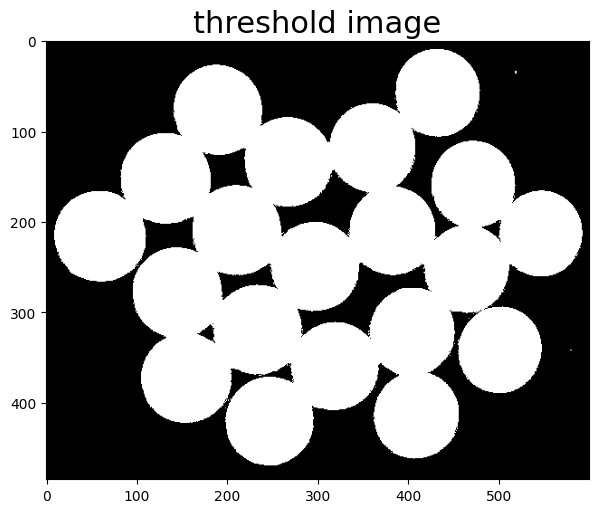

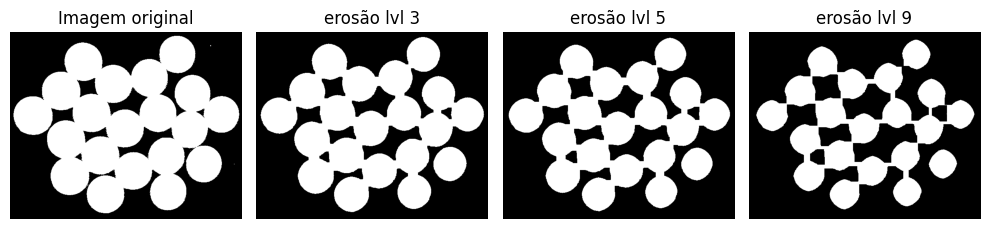

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

def showSingleImage(img, title, size, mincolor=0, maxcolor=255):
    fig, axis = plt.subplots(figsize = size)

    axis.imshow(img, cmap='gray', vmin=mincolor, vmax=maxcolor)
    axis.set_title(title, fontdict = {'fontsize': 22, 'fontweight': 'medium'})
    plt.show()

def show_images_table(images, titles):
    rows = 1
    cols = len(images)
    fig, axs = plt.subplots(rows, cols, figsize=(10,10))
    for i, ax in enumerate(axs):
        ax.imshow(images[i], cmap='gray')
        ax.set_title(titles[i])
        ax.axis('off')
    plt.tight_layout()
    plt.show()
#-----------------------------------------------------------------------------
# Carrega a imagem a ser erodida
#img = cv2.imread('/content/drive/MyDrive/DISCIPLINAS/IMAGENS_MÉDICAS/rosto.jpg', cv2.IMREAD_GRAYSCALE)
#img = cv2.imread('/content/drive/MyDrive/DISCIPLINAS/IMAGENS_MÉDICAS/moedas.jpeg', cv2.IMREAD_GRAYSCALE)
#img = cv2.imread('/content/drive/MyDrive/DISCIPLINAS/IMAGENS_MÉDICAS/quadrados.jpeg', cv2.IMREAD_GRAYSCALE)
img = cv2.imread('/content/drive/MyDrive/DISCIPLINAS/IMAGENS_MÉDICAS/5.jpg', cv2.IMREAD_GRAYSCALE)

# acima de 200 fica preto e abaixo fica branco
threshold, img= cv2.threshold(img,190,255,cv2.THRESH_BINARY_INV)
showSingleImage(img, "threshold image",(7,7))

#A primeira linha define o kernel (elemento estruturante) a ser usado na operação de erosão.
#Neste caso, o kernel é definido como um retângulo 3x3, criado pela função getStructuringElement do OpenCV.




# Define o kernel utilizado na operação de erosão
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))

# Realiza a erosão da imagem
erosão_1 = cv2.erode(img, kernel, iterations = 3)
erosão_2 = cv2.erode(img, kernel, iterations = 5)
erosão_3 = cv2.erode(img, kernel, iterations = 9)
# Mostra a imagem original e a imagem erodida
show_images_table([img, erosão_1, erosão_2, erosão_3], ['Imagem original', 'erosão lvl 3', 'erosão lvl 5', 'erosão lvl 9'])
  #show_images_table([img, erosão], ['Imagem original', 'Imagem com erosão'])



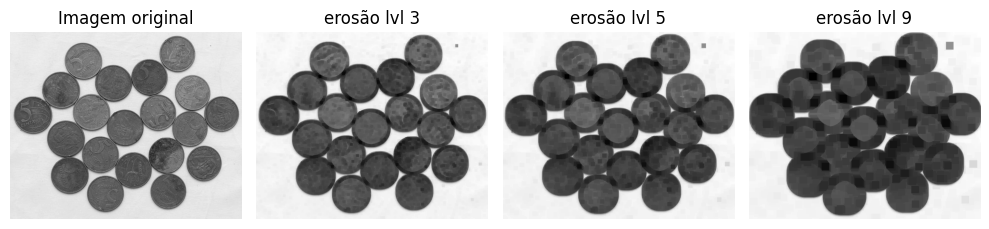

In [ ]:
#--------------------------------------------------------------------sem o filtro threshold
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt



def show_images_table(images, titles):
    rows = 1
    cols = len(images)
    fig, axs = plt.subplots(rows, cols, figsize=(10,10))
    for i, ax in enumerate(axs):
        ax.imshow(images[i], cmap='gray')
        ax.set_title(titles[i])
        ax.axis('off')
    plt.tight_layout()
    plt.show()
#-----------------------------------------------------------------------------
# Carrega a imagem a ser erodida
#img = cv2.imread('/content/drive/MyDrive/DISCIPLINAS/IMAGENS_MÉDICAS/rosto.jpg', cv2.IMREAD_GRAYSCALE)
#img = cv2.imread('/content/drive/MyDrive/DISCIPLINAS/IMAGENS_MÉDICAS/moedas.jpeg', cv2.IMREAD_GRAYSCALE)
#img = cv2.imread('/content/drive/MyDrive/DISCIPLINAS/IMAGENS_MÉDICAS/quadrados.jpeg', cv2.IMREAD_GRAYSCALE)
img = cv2.imread('/content/drive/MyDrive/DISCIPLINAS/IMAGENS_MÉDICAS/5.jpg', cv2.IMREAD_GRAYSCALE)

# acima de 200 fica preto e abaixo fica branco
#threshold, img= cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
#showSingleImage(img, "threshold image",(7,7))

#A primeira linha define o kernel (elemento estruturante) a ser usado na operação de erosão.
#Neste caso, o kernel é definido como um retângulo 3x3, criado pela função getStructuringElement do OpenCV.




# Define o kernel utilizado na operação de erosão
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))

# Realiza a erosão da imagem
erosão_1 = cv2.erode(img, kernel, iterations = 3)
erosão_2 = cv2.erode(img, kernel, iterations = 5)
erosão_3 = cv2.erode(img, kernel, iterations = 9)
# Mostra a imagem original e a imagem erodida
show_images_table([img, erosão_1, erosão_2, erosão_3], ['Imagem original', 'erosão lvl 3', 'erosão lvl 5', 'erosão lvl 9'])
  #show_images_table([img, erosão], ['Imagem original', 'Imagem com erosão'])


# **3 - Preenchimento dos objetos**

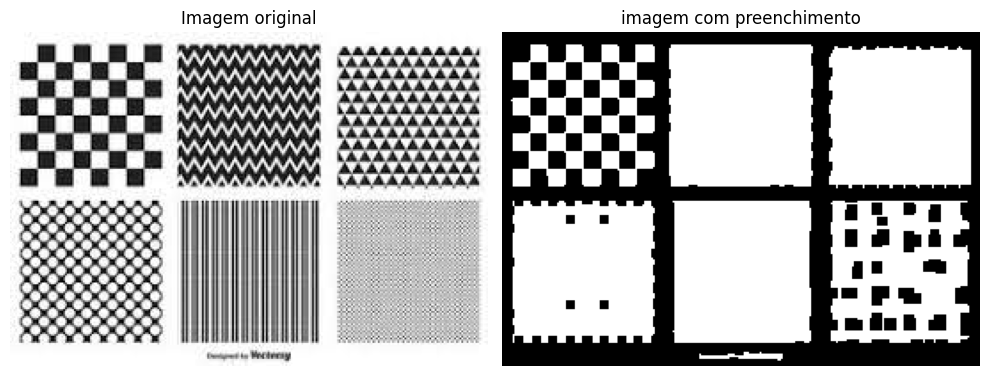

In [ ]:
import cv2  # importa a biblioteca OpenCV para processamento de imagens
from google.colab.patches import cv2_imshow  # importa a função cv2_imshow para exibir imagens no Google Colab
import matplotlib.pyplot as plt  # importa a biblioteca Matplotlib para plotar gráficos e imagens

# Carrega a imagem em escala de cinza a ser preenchida
img = cv2.imread('/content/drive/MyDrive/DISCIPLINAS/IMAGENS_MÉDICAS/quadrados.jpeg', cv2.IMREAD_GRAYSCALE)


# Aplica o algoritmo de thresholding para binarizar a imagem
_, thresh = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY_INV) #é aplicado o algoritmo de thresholding para binarizar a imagem utilizando a função cv2.threshold.
# O valor de 150 é definido como limite de intensidade para a binarização da imagem.

# Aplica a operação de fechamento para preencher os objetos na imagem
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5)) # kernel retangular

closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
#O objetivo da operação de fechamento é preencher pequenos buracos e eliminar pequenas lacunas nos objetos da imagem binária, fazendo com que esses objetos se tornem mais "completos".
#Essa operação é especialmente útil para remover pequenas irregularidades em objetos que devem ser considerados como um todo, como por exemplo, no caso de caracteres em uma imagem de texto.
# Exibe as imagens original e processada

show_images_table([img, closing], ['Imagem original', 'imagem com preenchimento'])


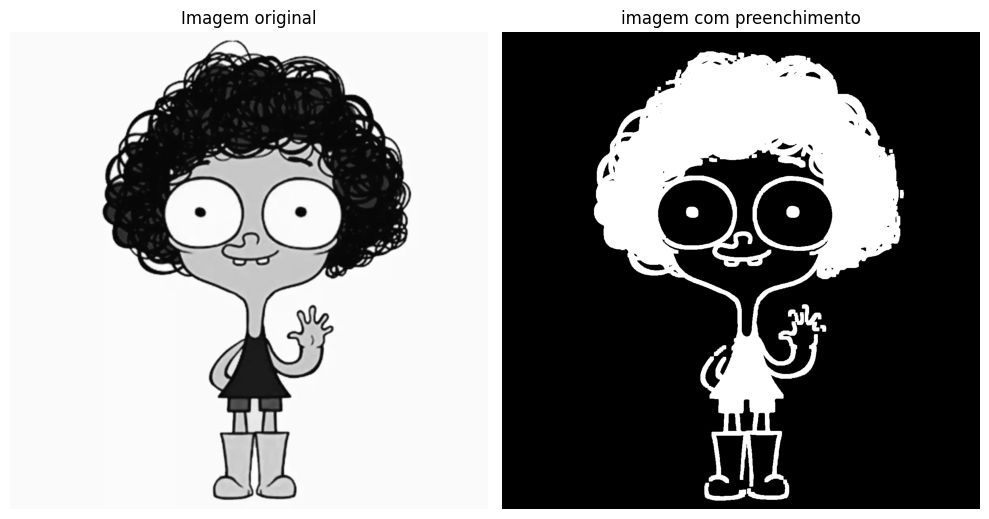

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# carrega a imagem
img = cv2.imread('/content/drive/MyDrive/DISCIPLINAS/IMAGENS_MÉDICAS/jorel.jpg', cv2.IMREAD_GRAYSCALE)




# aplica thresholding
ret, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# aplica erosão para remover bordas
kernel = np.ones((3, 3), np.uint8)
erosion = cv2.erode(thresh, kernel, iterations=2)

# aplica dilatação para preencher buracos
dilation = cv2.dilate(erosion, kernel, iterations=4)

# exibe a imagem preenchida
#cv2.imshow('Imagem Preenchida', dilation)

show_images_table([img, dilation], ['Imagem original', 'imagem com preenchimento'])

# 4 - Detecção de bordas

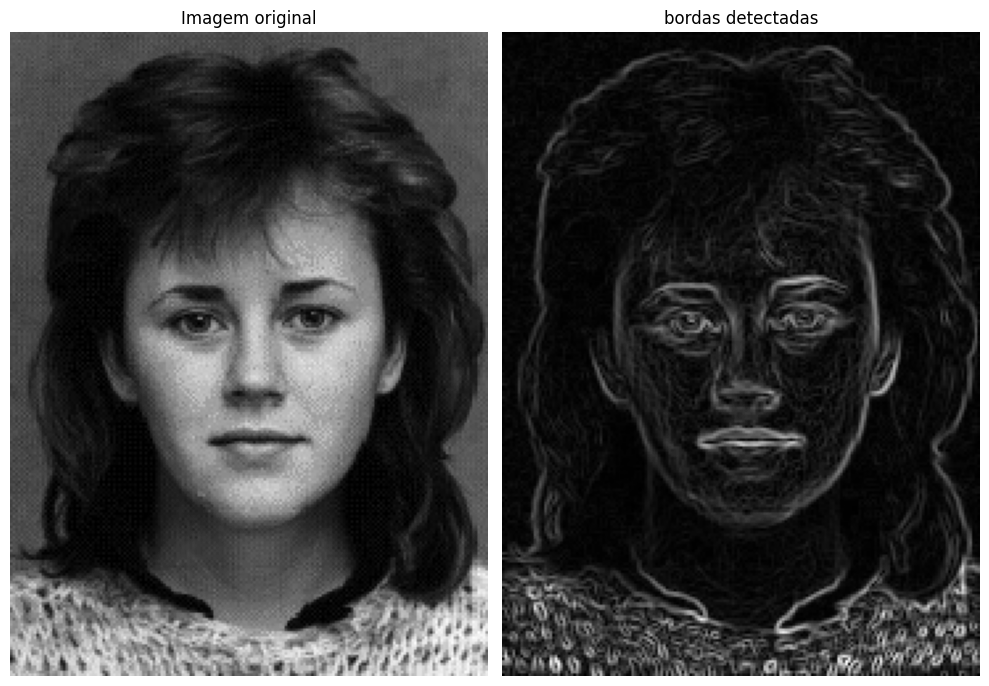

In [ ]:
import cv2  # importa a biblioteca OpenCV para processamento de imagens
from google.colab.patches import cv2_imshow  # importa a função cv2_imshow para exibir imagens no Google Colab
import matplotlib.pyplot as plt  # importa a biblioteca Matplotlib para plotar gráficos e imagens
import numpy as np
# Carrega a imagem em escala de cinza a ser preenchida
#img = cv2.imread('/content/drive/MyDrive/DISCIPLINAS/IMAGENS_MÉDICAS/quadrados.jpeg', cv2.IMREAD_GRAYSCALE)
#img = cv2.imread('/content/drive/MyDrive/DISCIPLINAS/IMAGENS_MÉDICAS/bolas.jpeg', cv2.IMREAD_GRAYSCALE)
img = cv2.imread('/content/drive/MyDrive/DISCIPLINAS/IMAGENS_MÉDICAS/rosto.jpg', cv2.IMREAD_GRAYSCALE)

#----------------

def show_images_table(images, titles):
    rows = 1
    cols = len(images)
    fig, axs = plt.subplots(rows, cols, figsize=(10,10))
    for i, ax in enumerate(axs):
        ax.imshow(images[i], cmap='gray')
        ax.set_title(titles[i])
        ax.axis('off')
    plt.tight_layout()
    plt.show()


#--------------


# Aplica o operador de Sobel para detecção de bordas
sobelx = cv2.Sobel( img, cv2.CV_64F, 1, 0)
sobely = cv2.Sobel( img, cv2.CV_64F, 0, 1)

# Calcula a magnitude das bordas
mag = np.sqrt(sobelx**2 + sobely**2)

# Normaliza o resultado para o intervalo [0,255]
mag = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

# Mostra a imagem com as bordas detectadas


#------
#Aplica o filtro de Sobel na imagem para detectar as bordas
#sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5) # aplica o filtro de Sobel na direção x
#sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5) # aplica o filtro de Sobel na direção y

#Combina as bordas detectadas pelas direções x e y
#sobel = cv2.bitwise_or(sobelx, sobely)

#Exibe a imagem resultante
#cv2_imshow(sobel)

#----------------
# converte a imagem para o tipo uint8
#sobel_uint8 = cv2.convertScaleAbs(sobel)

# exibe as imagens em uma tabela
#show_images_table([img, sobel_uint8], ['Imagem original', 'Imagem com Sobel'])
show_images_table([img, mag], ['Imagem original', 'bordas detectadas'])





# 5 - Abertura e Fechamento

Abertura e fechamento são operações morfológicas em processamento de imagens que são utilizadas para remover ruídos e objetos indesejados em uma imagem binária ou em escala de cinza.

A abertura consiste na erosão seguida de uma dilatação da imagem. Ela é eficaz em remover pequenos objetos, bem como lacunas entre objetos maiores, mantendo as bordas desses objetos relativamente intactas.

O fechamento, por sua vez, é a operação inversa da abertura, que consiste em uma dilatação seguida de uma erosão da imagem. O fechamento é útil para preencher lacunas e buracos em objetos, bem como para unir objetos próximos que estão separados por lacunas estreitas.

Ambas as operações podem ser realizadas com um elemento estruturante, que é uma matriz de pixels utilizada para definir a forma e o tamanho da janela utilizada na operação morfológica. O tamanho e a forma do elemento estruturante afetam o resultado da operação.

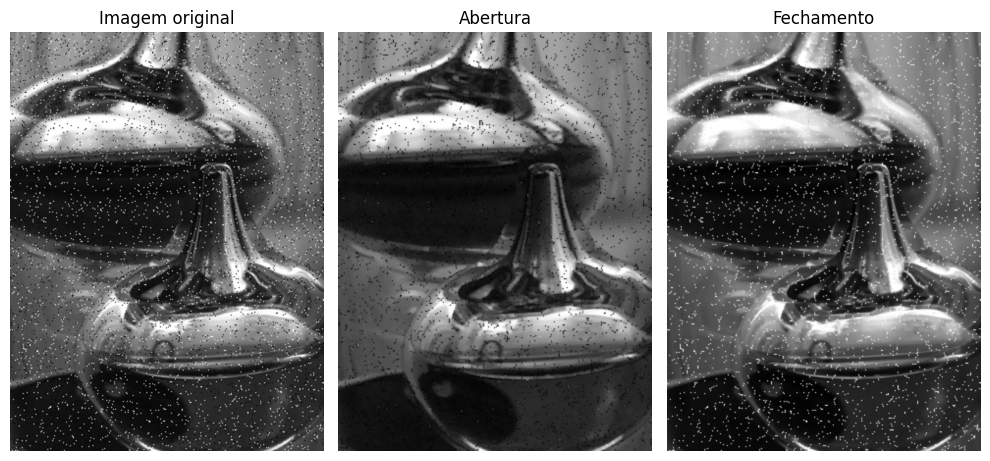

In [ ]:
#                                                                       ABERTURA

#SEM FILTRO
import cv2  # importa a biblioteca OpenCV para processamento de imagens
from google.colab.patches import cv2_imshow  # importa a função cv2_imshow para exibir imagens no Google Colab
import matplotlib.pyplot as plt  # importa a biblioteca Matplotlib para plotar gráficos e imagens


#def showSingleImage(img, title, size, mincolor=0, maxcolor=255):
    #fig, axis = plt.subplots(figsize = size)

    #axis.imshow(img, cmap='gray', vmin=mincolor, vmax=maxcolor)
    #axis.set_title(title, fontdict = {'fontsize': 22, 'fontweight': 'medium'})
    #plt.show()



# Carrega a imagem em escala de cinza a ser preenchida
img = cv2.imread('/content/drive/MyDrive/DISCIPLINAS/IMAGENS_MÉDICAS/ruido.png', cv2.IMREAD_GRAYSCALE)
#img = cv2.imread('/content/drive/MyDrive/DISCIPLINAS/IMAGENS_MÉDICAS/rosto.jpg', cv2.IMREAD_GRAYSCALE)
#img = cv2.imread('/content/drive/MyDrive/DISCIPLINAS/IMAGENS_MÉDICAS/fingerprint.jpg', cv2.IMREAD_GRAYSCALE)
#Aplicação da operação de abertura na imagem

#threshold, img= cv2.threshold(img,190,255,cv2.THRESH_BINARY_INV)
#showSingleImage(img, "threshold image",(7,7))

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5)) # define o elemento estruturante para a operação de abertura
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel) # aplica a operação de abertura

#Exibe a imagem resultante da abertura
#cv2_imshow(opening)

#Aplicação da operação de fechamento na imagem
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5)) # define o elemento estruturante para a operação de fechamento
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel) # aplica a operação de fechamento

#Exibe a imagem resultante do fechamento
#cv2_imshow(closing)
show_images_table([img, opening, closing], ['Imagem original', 'Abertura', 'Fechamento'])



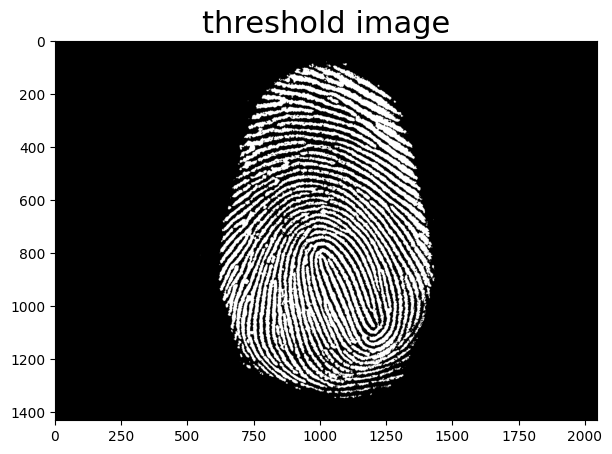

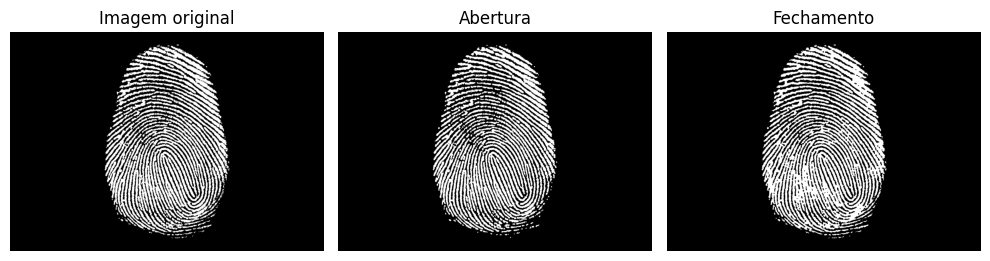

In [ ]:
#                                                                       ABERTURA

#SEM FILTRO
import cv2  # importa a biblioteca OpenCV para processamento de imagens
from google.colab.patches import cv2_imshow  # importa a função cv2_imshow para exibir imagens no Google Colab
import matplotlib.pyplot as plt  # importa a biblioteca Matplotlib para plotar gráficos e imagens


def showSingleImage(img, title, size, mincolor=0, maxcolor=255):
    fig, axis = plt.subplots(figsize = size)

    axis.imshow(img, cmap='gray', vmin=mincolor, vmax=maxcolor)
    axis.set_title(title, fontdict = {'fontsize': 22, 'fontweight': 'medium'})
    plt.show()



# Carrega a imagem em escala de cinza a ser preenchida

img = cv2.imread('/content/drive/MyDrive/DISCIPLINAS/IMAGENS_MÉDICAS/fingerprint.jpg', cv2.IMREAD_GRAYSCALE)
#Aplicação da operação de abertura na imagem

threshold, img= cv2.threshold(img,190,255,cv2.THRESH_BINARY_INV)
showSingleImage(img, "threshold image",(7,7))

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5)) # define o elemento estruturante para a operação de abertura
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel) # aplica a operação de abertura

#Exibe a imagem resultante da abertura
#cv2_imshow(opening)

#Aplicação da operação de fechamento na imagem
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5)) # define o elemento estruturante para a operação de fechamento
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel) # aplica a operação de fechamento

#Exibe a imagem resultante do fechamento
#cv2_imshow(closing)
show_images_table([img, opening, closing], ['Imagem original', 'Abertura', 'Fechamento'])


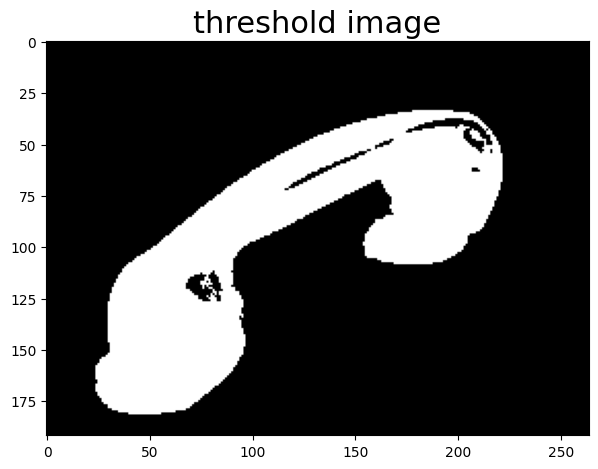

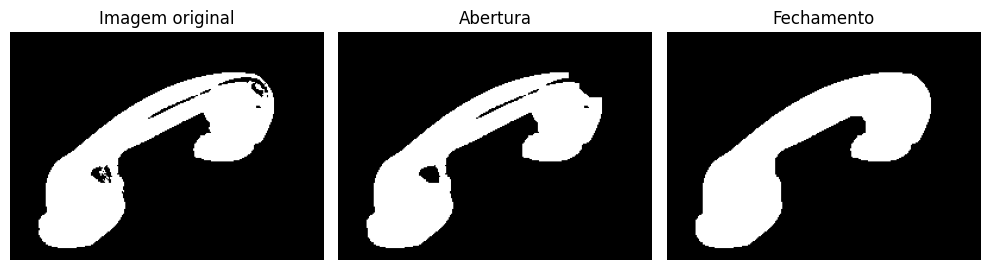

In [ ]:
#FECHAMENTO

import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt



img = cv2.imread('/content/drive/MyDrive/DISCIPLINAS/IMAGENS_MÉDICAS/fone.jpg', cv2.IMREAD_GRAYSCALE)


def showSingleImage(img, title, size, mincolor=0, maxcolor=255):
    fig, axis = plt.subplots(figsize = size)

    axis.imshow(img, cmap='gray', vmin=mincolor, vmax=maxcolor)
    axis.set_title(title, fontdict = {'fontsize': 22, 'fontweight': 'medium'})
    plt.show()
threshold, img= cv2.threshold(img,100,255,cv2.THRESH_BINARY_INV) #acima de 100 fica preto
showSingleImage(img, "threshold image",(7,7))


kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5)) # define o elemento estruturante para a operação de abertura
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel) # aplica a operação de abertura

#Exibe a imagem resultante da abertura
#cv2_imshow(opening)

#Aplicação da operação de fechamento na imagem
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9,9)) # define o elemento estruturante para a operação de fechamento
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel) # aplica a operação de fechamento

#Exibe a imagem resultante do fechamento
#cv2_imshow(closing)
show_images_table([img, opening, closing], ['Imagem original', 'Abertura', 'Fechamento'])



# Resumo

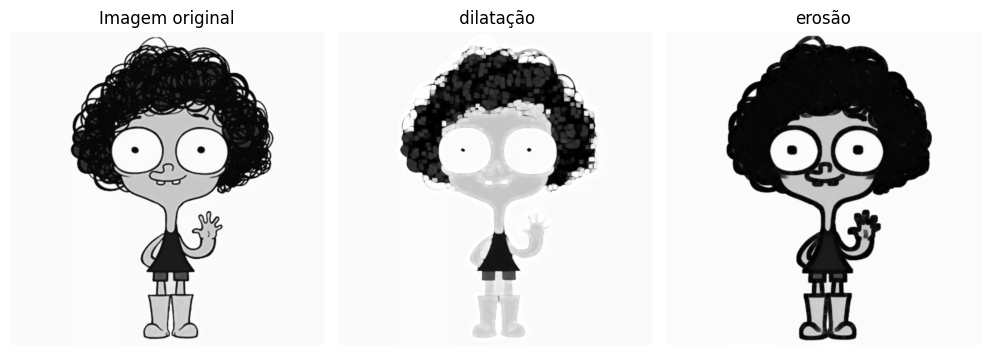

In [ ]:
#DILATAÇÃO E EROSÃO


import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/DISCIPLINAS/IMAGENS_MÉDICAS/jorel.jpg', cv2.IMREAD_GRAYSCALE)

def show_images_table(images, titles):
    rows = 1
    cols = len(images)
    fig, axs = plt.subplots(rows, cols, figsize=(10,10))
    for i, ax in enumerate(axs):
        ax.imshow(images[i], cmap='gray')
        ax.set_title(titles[i])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# cria o kernel de dilatação e erosão
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# aplica a dilatação na imagem
img_dilate = cv2.dilate(img, kernel, iterations=5)

# aplica a erosão na imagem
img_erode = cv2.erode(img, kernel, iterations=5)
# exibe a imagem dilatada

#cv2.imshow('Imagem Dilatada', img_dilate)

show_images_table([img, img_dilate,img_erode], ['Imagem original', ' dilatação', 'erosão'])


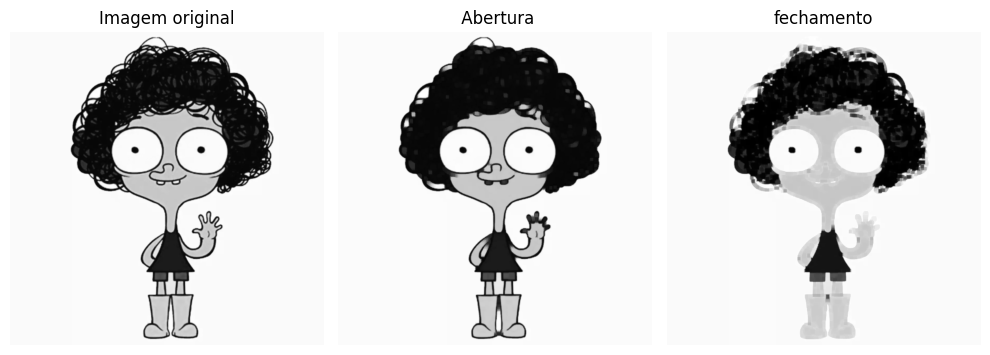

In [ ]:
#ABERTURA E FECHAMENTO
import cv2
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/DISCIPLINAS/IMAGENS_MÉDICAS/jorel.jpg', cv2.IMREAD_GRAYSCALE)

def show_images_table(images, titles):
    rows = 1
    cols = len(images)
    fig, axs = plt.subplots(rows, cols, figsize=(10,10))
    for i, ax in enumerate(axs):
        ax.imshow(images[i], cmap='gray')
        ax.set_title(titles[i])
        ax.axis('off')
    plt.tight_layout()
    plt.show()



# cria o kernel de abertura e fechamento
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# aplica a abertura na imagem
img_open = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel, iterations=5)


# aplica o fechamento na imagem
img_close = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel, iterations=5)


show_images_table([img, img_open, img_close], ['Imagem original', ' Abertura', 'fechamento'])
